In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/home/alpha/2410/2410-machine-learning/data/Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [5]:
df.drop(columns='Unnamed: 0', inplace = True)

In [6]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [7]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [15]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


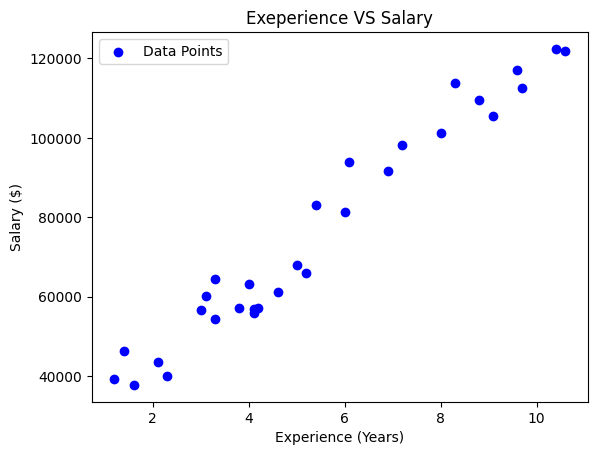

In [16]:
plt.scatter(df['YearsExperience'], df['Salary'], color = 'blue', label = 'Data Points')
plt.title('Exeperience VS Salary')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary ($)')
plt.legend()
plt.show()

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X = df[['YearsExperience']] # Independent Feature
y = df['Salary'] # dependent feature

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [28]:
X_test

,YearsExperience
16,5.2
20,6.9
10,4.0
15,5.0
21,7.2
4,2.3


In [27]:
y_pred = model.predict(X_test)
y_pred

array([74502.41002938, 90280.63442954, 63364.83986457, 72646.14833525,
       93065.02697075, 47586.61546441])

In [29]:
# y = m(slope)*x(Experience)+c(intercept)


m = model.coef_
c = model.intercept_

print(m, c)

[9281.30847068] 26239.605981844703


In [32]:
x = float(input('Enter your experience:'))
y = m*x+c
print(f'Your salary will be: {y}')

Your salary will be: [91208.76527661]


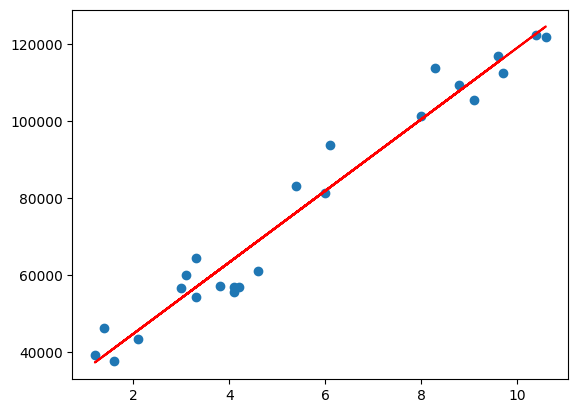

In [34]:
plt.scatter(X_train, y_train)
plt.plot(X_train, model.predict(X_train), color = 'red')

In [35]:
score = r2_score(y_test, y_pred)
score 

0.918417084921423

In [37]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()

In [38]:
model.predict(X_test)

16    67396.303734
20    89429.710725
10    51843.310565
15    64804.138206
21    93317.959017
4     29809.903575
dtype: float64

In [39]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              794.9
Date:                Wed, 18 Dec 2024   Prob (F-statistic):                    2.43e-19
Time:                        23:26:23   Log-Likelihood:                         -262.83
No. Observations:                  24   AIC:                                      527.7
Df Residuals:                      23   BIC:                                      528.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [43]:
# R_Squre = 1 - SSR/SST

1/30

0.03333333333333333

In [40]:
df.shape

(30, 2)